# Calidad de datos

## Introducción

La finalidad de este notebook es dar calidad a los datos de barrios y caracteísticas que nos devuelve nuestro módulo de python main.
El archivo a leer es un geojson que resulta de intersectar el dataset incial de barrios con los datasets de características que hemos recopilado.

La metodología que se ha utilizado para llevar a cabo esta fase del proyecto es la siguiente:

1. Lectura de los datos.
2. Exploración.
3. Eliminación de filas y columnas.
4. Cambio de los tipos de datos y tratamiento de nulos.

> *Nota: Ejecutar las celdas de código en orden conforme van apereciendo.


## Declaración de imports

En la siguiente celda se importan las librerías necesarias para llevar a cabo esta tarea. Se explican a continuación:

* **json**: Se utiliza para leer el archivo de barrios_caracteristicas_final y cargarlo.
* **geopandas**: Al tratarse de datos geográficos tendremos que generar un primer dataframe con geopandas.
* **pandas**: Es la librería con la que efectuaremos la mayor parte de nuestro análisis.
* **numpy**: Esta librería la utilizamos principalmete para el tratamiento de los datos nulos
* **matplotlib**: Representación de gráficas con python.

In [75]:
import json
import geopandas as gpd
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

## 1. Lectura de los datos

Incialmente se lee el fichero de salida de nuestro main.py. Al tratarse de un fichero geojson, la información relevante se almacena en un campo del geojson llamado *features*. Pr tanto en la siguiente celda se realizan los siguientes pasos:
1. Carga de los datos como json.
2. Almacenamiento del campo *features* dentro de una lista.
3. Leemos la lista generada con geopandas para generar un geodataframe.

In [76]:
path = '../datos/datos_out/barrios_caracteristicas_final.geojson'


with open(path) as json_file:
    json_data = json.load(json_file)

barrios_json = []
for i in range(len(json_data['features'])):
    barrios_json.append(json_data['features'][i])


barrios_gdf = gpd.GeoDataFrame.from_features(barrios_json)

Una vez se ha generado el geodataframe, nos interesa leerlo con pandas para facilitar el trabajo. Para comprobar que esta acción se ha realizado correctamente llamamos a `barrios_df` y en la ejecución se nos muestra el dataframe que resulta. De esta forma ya tenemos un primer vistazo en crudo de nuestros datos.

 Esta acción se realiza en la celda de abajo:

In [77]:
barrios_df = pd.DataFrame(barrios_gdf)

barrios_df

,geometry,coddistrit,gis_gis_barrios_area,object_id_barrio,linkid,codbarrio,coddistbar,geo_point_2d,nombre_barrio,last_edited_user,...,num_colegios,id_caract_num_colegios,num_chargestations,id_caract_num_chargestations,pm25,id_caract_pm25,num_contenedores,id_caract_num_contenedores,num_transporte,id_caract_num_transporte
0,"POLYGON ((-0.33459 39.45478, -0.33326 39.45487...",11,917112.56250,62,0,5,115,"[39.44628964870906, -0.3326600366971329]",NATZARET,None,...,6.0,2,NaN,8,10.0,5,184.0,7,11.0,1
1,"POLYGON ((-0.38124 39.45463, -0.38281 39.44951...",9,374887.53125,63,0,3,093,"[39.45082750748332, -0.3853982961775011]",LA CREU COBERTA,None,...,1.0,2,2.0,8,21.0,5,162.0,7,8.0,1
2,"POLYGON ((-0.34709 39.47548, -0.34144 39.47379...",13,NaN,76,0,2,132,"[39.47198431553791, -0.3450427029615464]",CIUTAT JARDI,None,...,5.0,2,NaN,8,12.0,5,238.0,7,10.0,1
3,"POLYGON ((-0.28767 39.55682, -0.28829 39.55654...",17,NaN,601,18,5,175,"[39.55880504953868, -0.3031699565111558]",RAFALELL-VISTABELLA,None,...,NaN,2,NaN,8,12.0,5,NaN,7,NaN,1
4,"POLYGON ((-0.33151 39.48561, -0.33254 39.48046...",13,NaN,137,0,5,135,"[39.48035805242704, -0.3410905938386986]",LA CARRASCA,None,...,10.0,2,NaN,8,12.0,5,237.0,7,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,"POLYGON ((-0.39047 39.47825, -0.38996 39.47754...",3,496668.75000,28,0,3,033,"[39.473565513491664, -0.39098170775459257]",LA PETXINA,None,...,11.0,2,NaN,8,12.0,5,279.0,7,14.0,1
84,"POLYGON ((-0.37567 39.47381, -0.37423 39.47351...",1,438658.31250,37,0,6,016,"[39.47010643870186, -0.3760489821791233]",SANT FRANCESC,None,...,2.0,2,2.0,8,12.0,5,580.0,7,27.0,1
85,"POLYGON ((-0.35018 39.42223, -0.35011 39.42227...",19,NaN,249,0,3,193,"[39.406290326215334, -0.33967854582733203]",PINEDO,None,...,2.0,2,NaN,8,10.0,5,185.0,7,14.0,1
86,"POLYGON ((-0.36720 39.50425, -0.36767 39.50338...",15,NaN,201,0,1,151,"[39.494312122911424, -0.3699310988383476]",ELS ORRIOLS,None,...,9.0,2,NaN,8,NaN,5,214.0,7,21.0,1


## 2. Exploración

En esta fase se miran los datos con más detenimiento. En nuestro caso vamos a ver el número de nulos que hay en el dataframe y las columnas con las que nos interesa quedarnos y cuales podríamos eliminar.

Para poder ver el número de nulos de una manera visual, a continuación se implementa la función `plot_nas`, que en caso de que un dataframe pasado como parámetros haya nulos presentes nos represente sus columnas con la cantidad de nulos en tanto por ciento (%).

In [78]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

### 2.1 Exploración de columnas

In [79]:
barrios_df.columns

Index(['geometry', 'coddistrit', 'gis_gis_barrios_area', 'object_id_barrio',
       'linkid', 'codbarrio', 'coddistbar', 'geo_point_2d', 'nombre_barrio',
       'last_edited_user', 'last_edited_date', '%_zona_verde',
       'id_caract_%_zona_verde', 'nivel_acustico', 'id_caract_nivel_acustico',
       'num_hospitales', 'id_caract_num_hospitales', 'num_colegios',
       'id_caract_num_colegios', 'num_chargestations',
       'id_caract_num_chargestations', 'pm25', 'id_caract_pm25',
       'num_contenedores', 'id_caract_num_contenedores', 'num_transporte',
       'id_caract_num_transporte'],
      dtype='object')

### 2.2 Exploración de nulos

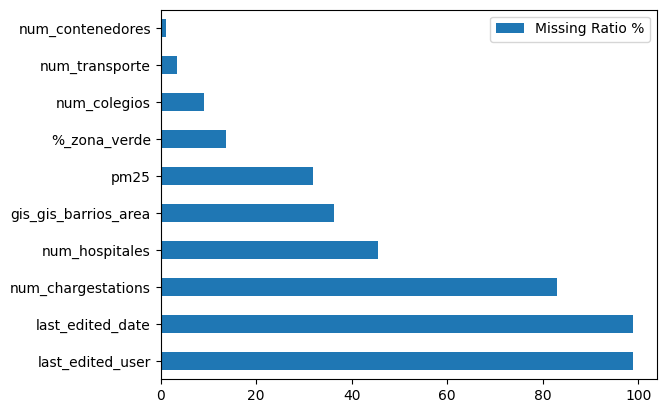

In [80]:
plot_nas(barrios_df) 

### 2.3 Conclusión

Atendiendo al gráfico anterior y a las columnas que componen el dataframe vemos que `last_edited_user` y `last_edited_date` tienen casi un 100% de datos nulos, por tanto, son candidatatas a ser eliminadas.

En nuestro caso, se utiliza como identificativo único de cada barrio la columna de `object_id_barrio`, por lo que el resto de columnas identificativas se pueden eliminar al no tener ninguna relación con otros datos dentro de nuestro proyecto (`coddistrit`, `linkid`, `codbarrio`, `coddistbar`).

Por último, otra columna que tiene muchos nulos es la de `gis_gis_barrios_area`, además de que en nuestro main de python abordamos la tarea de calcular las areas de cada barrio para su representación. Por tanto también es candidata para ser eliminada.


## 3. Eliminación de columnas y filas

Atendiendo a las conclusiones anteriores barramos las columnas mencionadas mediante el método drop() de pandas y comprobamos las columnas del dataframe para ver que han sido eliminadas correctamente.

In [81]:
barrios_df = barrios_df.drop(['coddistrit', 'linkid', 'codbarrio', 'coddistbar', 'last_edited_user', 'last_edited_date', 'gis_gis_barrios_area'], axis = 1)

barrios_df.columns


Index(['geometry', 'object_id_barrio', 'geo_point_2d', 'nombre_barrio',
       '%_zona_verde', 'id_caract_%_zona_verde', 'nivel_acustico',
       'id_caract_nivel_acustico', 'num_hospitales',
       'id_caract_num_hospitales', 'num_colegios', 'id_caract_num_colegios',
       'num_chargestations', 'id_caract_num_chargestations', 'pm25',
       'id_caract_pm25', 'num_contenedores', 'id_caract_num_contenedores',
       'num_transporte', 'id_caract_num_transporte'],
      dtype='object')

Para la eliminación de las filas, establecemos el criterio de quedarnos con los barrios del núcleo úrbano de Valencia. Con lo que descarteremos los barrios de extraradio del sur de la ciudad.
En la siguiente celda de código se especifican las filas de los barrios a eliminar y accediendo a las dimensiones del dataframe con `shape` comprobamos si se han eliminado las filas del datframe.

In [82]:
blacklist = ['EL PALMAR', 'EL PERELLONET', 'EL SALER', 'PINEDO', 'LES CASES DE BARCENA', 'MASSARROJOS', 'MAHUELLA-TAULADELLA', 'RAFALELL-VISTABELLA']

for i in blacklist:
    barrios_df = barrios_df.drop(barrios_df.loc[barrios_df['nombre_barrio'] == i].index)


barrios_df.shape

(80, 20)

Para una comprobación más precisa, si ahora trataramos de acceder a la fila del barrio de PINEDO no nos debería aperecer ninguna información.

In [83]:
barrios_df.loc[barrios_df['nombre_barrio'] == 'PINEDO']

,geometry,object_id_barrio,geo_point_2d,nombre_barrio,%_zona_verde,id_caract_%_zona_verde,nivel_acustico,id_caract_nivel_acustico,num_hospitales,id_caract_num_hospitales,num_colegios,id_caract_num_colegios,num_chargestations,id_caract_num_chargestations,pm25,id_caract_pm25,num_contenedores,id_caract_num_contenedores,num_transporte,id_caract_num_transporte


## 4. Cambio de tipos de datos y tratamiento de nulos

Una vez hemos eliminado la información que no nos interesa del dataframe. Tendremos que tratar con los valores que faltan referidos a las caracteristicas almacenadas en el dataframe.

Volvemos a llamar a la función que representa la cantidad de nulos para hacernos una idea de lo que hay en este punto.
También comprobamos los tipos de datos que tenemos con el método `info()` de pandas.

Nótese también que para el numero de estaciones de carga para coche eléctrico (`num_chargestations`) tiene hasta un 80% de valores nulos (ejecutar celda de abajo previamente). Eso se debe a que hay pocos barrios que cuenten con con estas estaciones.
Dado este caso resultaría interesante almacenar este valor como `bool` de forma que si hay estaciones en un barrio la celda tenga el valor *True* y si no las hay se almacene como *False*.

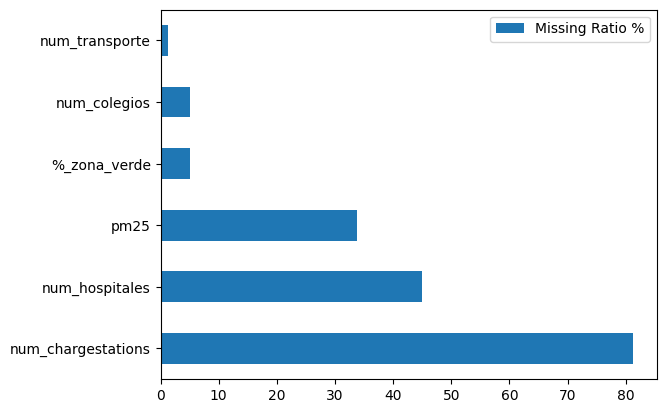

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 87
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geometry                      80 non-null     geometry
 1   object_id_barrio              80 non-null     int64   
 2   geo_point_2d                  80 non-null     object  
 3   nombre_barrio                 80 non-null     object  
 4   %_zona_verde                  76 non-null     float64 
 5   id_caract_%_zona_verde        80 non-null     int64   
 6   nivel_acustico                80 non-null     float64 
 7   id_caract_nivel_acustico      80 non-null     int64   
 8   num_hospitales                44 non-null     float64 
 9   id_caract_num_hospitales      80 non-null     int64   
 10  num_colegios                  76 non-null     float64 
 11  id_caract_num_colegios        80 non-null     int64   
 12  num_chargestations            15 non-null     float6

In [84]:
plot_nas(barrios_df)
barrios_df.info()

Podemos ver que `num_hospitales`, `num_colegios`, `num_chargestations`, `num_contenedores`, `num_transporte` que representan valores discretos, están almacenados como *float64*. La idea con estos valores es convertirlos a enteros (*int64*). Para ello previamente llenamos los valores NaN con un 0 por medio del metodo `fillna()` . Ya que se entiende que si no hay un valor almacenado para una determinada caracteristica de las mencionadas es porque en ese barrio hay 0 puntos referidos a esa caracteristica.

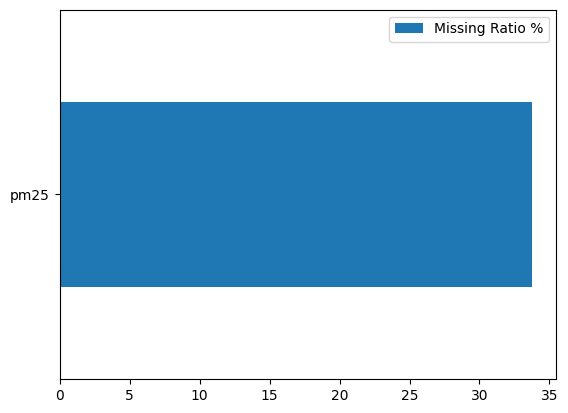

In [85]:
myList = ['%_zona_verde', 'num_hospitales', 'num_colegios', 'num_chargestations', 'num_contenedores', 'num_transporte']

for i in myList:
    barrios_df[i] = barrios_df[i].fillna(0)

plot_nas(barrios_df)

Una vez hemos rellenado los nulos vemos que la única columna con nulos es el indice de *pm25* que representa el indice de contaminación ambiental y que abordaremos más adelante.

Con el código de abajo, realizamos el cambio de los tipos de datos. Como se ha indicado anteriormente las caracteristicas que representan un valor discreto se almacenan como *int64* las que representan valores decimales como *float64* y las estaciones de carga, debido a su escasez se almacena como bool para daterminar la existencia de esta caracteristica en determinado barrio.

In [86]:
# CHANGING DATA TYPES
# Los hospitales, colegios, contenedores, estaciones de transporte son valores discretos que en nuestro df vienen como float64. Los cambiamos a int64

myList = ['num_hospitales', 'num_colegios', 'num_contenedores', 'num_transporte']

for i in myList:
    barrios_df[i] = barrios_df[i].astype('int64')

# Las estaciones de carga (num_chargestations) están presentes en muy pocos barrios. Por tanto nos interesa ver en qué barrios están presentes estas. Para ello haremos que la columna num_chargestations sea bool. De forma que
# indique True, cuando un barrio tiene estaciones de carga y False cuando no. Le cambiamos el nobre a la columna num_chargestations por chargestations para no indicar el nombre de la columna que es un número

barrios_df['num_chargestations'] = barrios_df['num_chargestations'].astype('bool')
barrios_df = barrios_df.rename(columns = {'num_chargestations' : 'chargestations'}) # Le cambiamos el nombre a la columna, porque esta ya no va arepresentar un número

barrios_df.info() # Comprobamos que se han cambiado correctamente los tipos de datos con el metodo .info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 87
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geometry                      80 non-null     geometry
 1   object_id_barrio              80 non-null     int64   
 2   geo_point_2d                  80 non-null     object  
 3   nombre_barrio                 80 non-null     object  
 4   %_zona_verde                  80 non-null     float64 
 5   id_caract_%_zona_verde        80 non-null     int64   
 6   nivel_acustico                80 non-null     float64 
 7   id_caract_nivel_acustico      80 non-null     int64   
 8   num_hospitales                80 non-null     int64   
 9   id_caract_num_hospitales      80 non-null     int64   
 10  num_colegios                  80 non-null     int64   
 11  id_caract_num_colegios        80 non-null     int64   
 12  chargestations                80 non-null     bool  

Como resultado de la ejecución del código anterior comprobamos que el cambio de tipo de datos se ha realizado correctamente.

También se puede comprobar que los valores almacenados para las estaciones de carga son *True* cuando hay estaciones de carag en un barrio y *False* cuando no:

In [87]:
barrios_df[['nombre_barrio','chargestations']]

,nombre_barrio,chargestations
0,NATZARET,False
1,LA CREU COBERTA,True
2,CIUTAT JARDI,False
4,LA CARRASCA,False
7,SANT LLORENS,False
...,...,...
82,BENICALAP,False
83,LA PETXINA,False
84,SANT FRANCESC,True
86,ELS ORRIOLS,False


Por último, nos queda tratar con los nulos de la característica *pm25*.

Primero, vamos a ver para qué barrios falta este valor:

In [88]:
print(barrios_df.loc[barrios_df['pm25'].isna()].shape)
barrios_df.loc[barrios_df['pm25'].isna()]['nombre_barrio']

(27, 20)


7             SANT LLORENS
10                 CARPESA
12              BENIFARAIG
14                EL CARME
15               EXPOSICIO
16                MESTALLA
25              JAUME ROIG
27          SANT MARCEL.LI
29                  LA SEU
35               TORREFIEL
36                  TORMOS
37                TRINITAT
38            LES TENDETES
47               POBLE NOU
50                LA TORRE
51                FAITANAR
52        EL FORN D'ALCEDO
54                  FAVARA
55       L'HORT DE SENABRE
56               CAMI REAL
65           LA MALVA-ROSA
67             SANT ANTONI
68              BENIMACLET
69              MARXALENES
70                MORVEDRE
71    CIUTAT UNIVERSITARIA
86             ELS ORRIOLS
Name: nombre_barrio, dtype: object

Con la celda de código anterior vemos para que barrios falta el *pm25* y cuantos barrios son en total con shape (27).

El método que hemos pensado para eliminar los nulls de este valor consiste en agrupar los barrios para los que falta el *pm25* según en qué zona de valencia se encuentran ( Ennorte, centro, sur o este) y le asignamos el indice de *pm25* conocido de un barrio que pertenzca a dicha zona. En este caso los indices de *pm25* escogidos son:

* **Norte**: Escogemos cómo referencia el *pm25* del barrio BENIMAMET.
* **Centro**: Escogemos cómo referencia el *pm25* del barrio EL PLA DEL REMEI.
* **Sur**: Escogemos cómo referencia el *pm25* del barrio MALILLA.
* **Este**: Escogemos cómo referencia el *pm25* del barrio CABANYAL-CANYAMELAR.

In [89]:

# Agrupar por zonas en los que falte pm25 y asignar pm25 de barrios colindantes

# Estos son  los barrios donde falta el pm25 agrupados por su localización
NORTE = ['SANT LLORENS', 'CARPESA', 'BENIFARAIG', 'TORREFIEL', 'TORMOS', 'POBLE NOU', 'SANT ANTONI', 'BENIMACLET', 'MARXALENES', 'ELS ORRIOLS']
CENTRO = ['EL CARME', 'EXPOSICIO', 'MESTALLA', 'LA SEU', 'JAUME ROIG', 'TRINITAT', 'LES TENDETES', 'MORVEDRE', 'CIUTAT UNIVERSITARIA']
SUR = ["SANT MARCEL.LI", "LA TORRE", "FAITANAR", "EL FORN D'ALCEDO", "FAVARA", "L'HORT DE SENABRE", "CAMI REAL"]
ESTE = ['LA MALVA-ROSA']

# Para rellenar estos valores asignaremos un indice de pm25 conocido de un barrio que pertenezca a una zona determinada. Por ejemplo, para los barrios del norte cogemos el pm25 de 
# un barrio del norte y lo ponemos para el resto de barrios de la lista que no tienen pm25

# Almacenamos los valores de pm25 para los barrios de cada zona
pm25_norte = int(barrios_df.loc[barrios_df['nombre_barrio'] == 'BENIMAMET']['pm25'])
pm25_centro = int(barrios_df.loc[barrios_df['nombre_barrio'] == 'EL PLA DEL REMEI']['pm25'])
pm25_sur = int(barrios_df.loc[barrios_df['nombre_barrio'] == 'MALILLA']['pm25'])
pm25_este = int(barrios_df.loc[barrios_df['nombre_barrio'] == 'CABANYAL-CANYAMELAR']['pm25'])
 
    


In [90]:
for i in barrios_df['nombre_barrio']:
    if i in NORTE:
        barrios_df.loc[barrios_df['nombre_barrio'] == i] = barrios_df.fillna(pm25_norte)
    elif i in CENTRO:
        barrios_df.loc[barrios_df['nombre_barrio'] == i] = barrios_df.fillna(pm25_centro)
    elif i in SUR:
        barrios_df.loc[barrios_df['nombre_barrio'] == i] = barrios_df.fillna(pm25_sur)
    elif i in ESTE:
        barrios_df.loc[barrios_df['nombre_barrio'] == i] = barrios_df.fillna(pm25_este)


barrios_df[['nombre_barrio', 'pm25']].values

array([['NATZARET', 10.0],
       ['LA CREU COBERTA', 21.0],
       ['CIUTAT JARDI', 12.0],
       ['LA CARRASCA', 12.0],
       ['SANT LLORENS', 26.0],
       ['VARA DE QUART', 7.0],
       ['SOTERNES', 17.0],
       ['CARPESA', 26.0],
       ['EL BOTANIC', 12.0],
       ['BENIFARAIG', 26.0],
       ['EL CALVARI', 26.0],
       ['EL CARME', 12.0],
       ['EXPOSICIO', 12.0],
       ['MESTALLA', 12.0],
       ['LA XEREA', 12.0],
       ['ALBORS', 10.0],
       ['ARRANCAPINS', 21.0],
       ['PATRAIX', 7.0],
       ['RUSSAFA', 21.0],
       ['SAFRANAR', 7.0],
       ['EN CORTS', 21.0],
       ['JAUME ROIG', 12.0],
       ['PENYA-ROJA', 10.0],
       ['SANT MARCEL.LI', 21.0],
       ["CASTELLAR-L'OLIVERAL", 21.0],
       ['LA SEU', 12.0],
       ['MONTOLIVET', 21.0],
       ['LA FONTETA S.LLUIS', 21.0],
       ['EL GRAU', 10.0],
       ['CAMI DE VERA', 12.0],
       ['LA LLUM', 17.0],
       ['TORREFIEL', 26.0],
       ['TORMOS', 26.0],
       ['TRINITAT', 12.0],
       ['LES TENDETES', 

Si volvemos a llamar a la función `plot_nas()`, ¡Vemos que ya no hay nulos!

Por tanto habríamos terminado con esta parte.

In [91]:
plot_nas(barrios_df)

No NAs found


## 5. Conclusión

Con este notebook se ha mostrado el proceso de calidad del dato para un dataframe que venía inicialmente con columnas irrelevantes, barrios que no nos interesaban y muchos nulos. Paso a paso hemos ido tratando de ver cómo podiamos rellenar los datos faltantes y averiguar de qué forma podían resultar más significativos para nuestro análisis y fases futuras del proyecto.

Cómo propuesta de mejora continua, hubiera sido interesante almacenar estos datos, ya tratados, en una base de datos de forma que se pudieran visualizar a través de alguna herramienta de BI. Ofreciendo una información más precisa y de más relevancia.